In [504]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind, mannwhitneyu
from copy import copy
from sklearn.model_selection import train_test_split


In [505]:
file_path = 'data//avito_new_data_for_dano.xlsx'

data = pd.read_excel(file_path)
data['CTR'] = data['page_views']
data['CR'] = data['contacts'] / data['page_views'] * 100
df = data

In [506]:
# Метод IQR для определения выбросов
Q1 = df['CR'].quantile(0.25)
Q3 = df['CR'].quantile(0.9)
IQR = Q3 - Q1
f = len(df['CR'])

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[df['CR'] <= upper_bound]
procentage = str((1 - (len(df['CR']) / f)) * 100)
print(procentage + '% выбросы')
print(f - len(df['CR']), 'удалено')

3.625999999999996% выбросы
1813 удалено


age 0.8340000000000014% выбросы
2230 удалено


D:\Программы\Temp\Temp\ipykernel_18456\1101642159.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['has_video'].replace({'ЛОЖЬ': 0, 'ИСТИНА': 1}, inplace=True)
D:\Программы\Temp\Temp\ipykernel_18456\1101642159.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

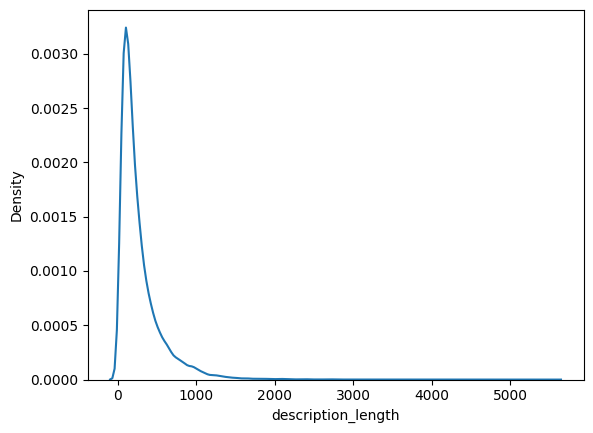

price 0.2800000000000029% выбросы
2370 удалено


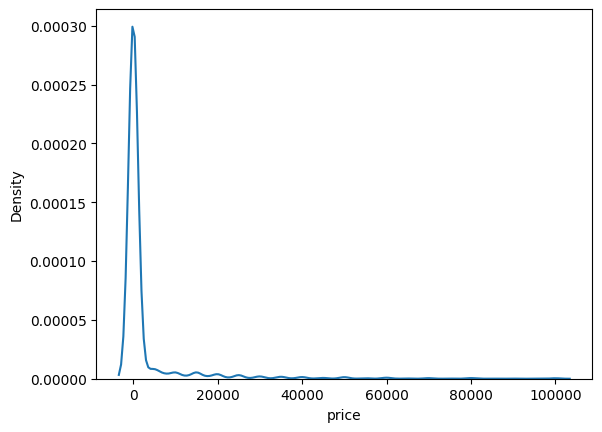

desc 1.4619999999999962% выбросы
3101 удалено
photo 0.0020000000000024443% выбросы
3102 удалено
итог вапрпывоарпроа
6.203999999999999
46898
                  bins  median_y  count
0       (-0.02, 41.36]  1.539536   2461
1       (41.36, 82.74]  1.524927   6150
2      (82.74, 124.12]  1.472048   6901
3      (124.12, 165.5]  1.416190   5966
4      (165.5, 206.88]  1.400567   4569
5     (206.88, 248.26]  1.355293   3640
6     (248.26, 289.64]  1.209168   2949
7     (289.64, 331.02]  1.265621   2301
8      (331.02, 372.4]  1.127820   1880
9      (372.4, 413.78]  1.151360   1513
10    (413.78, 455.16]  1.129856   1313
11    (455.16, 496.54]  0.939211   1015
12    (496.54, 537.92]  1.095529    916
13     (537.92, 579.3]  0.882780    777
14     (579.3, 620.68]  0.818279    687
15    (620.68, 662.06]  0.856722    599
16    (662.06, 703.44]  0.740777    479
17    (703.44, 744.82]  0.716519    406
18     (744.82, 786.2]  0.877359    400
19     (786.2, 827.58]  0.780787    311
20    (827.58, 868.9

D:\Программы\Temp\Temp\ipykernel_18456\1101642159.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('bins').agg(median_y=(y, 'mean' if do_mean else 'median'), count=(y, 'size')).reset_index()


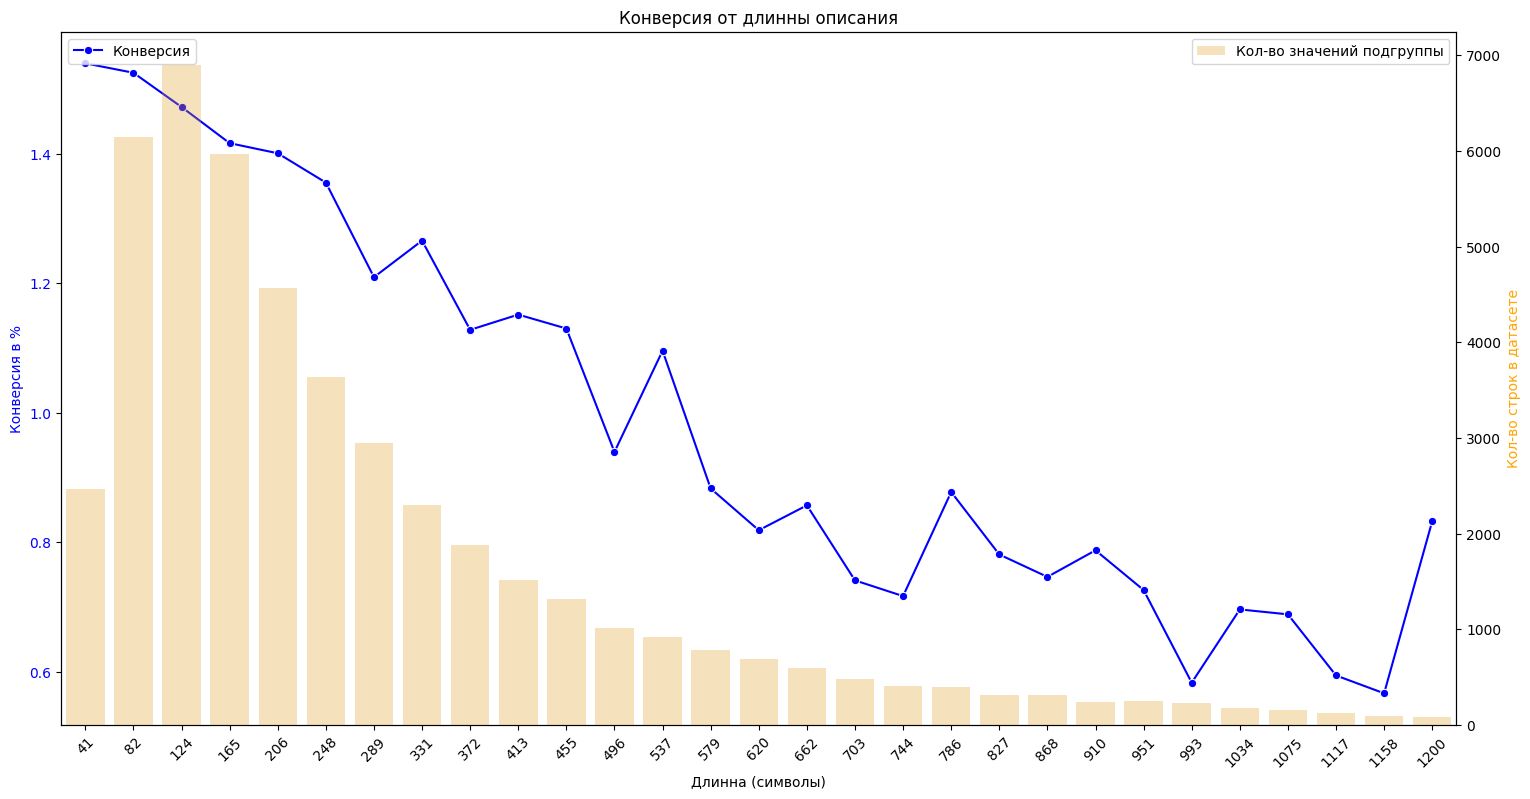

D:\Программы\Temp\Temp\ipykernel_18456\1101642159.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('bins').agg(median_y=(y, 'mean' if do_mean else 'median'), count=(y, 'size')).reset_index()


          bins  median_y  count
0   (0.0, 1.0]  1.386908   9137
1   (1.0, 2.0]  1.322687   8771
2   (2.0, 3.0]  1.304164   8919
3   (3.0, 4.0]  1.270775   6303
4   (4.0, 5.0]  1.239210   4535
5   (5.0, 6.0]  1.307792   2984
6   (6.0, 7.0]  1.176084   1937
7   (7.0, 8.0]  1.207016   1344
8   (8.0, 9.0]  1.333927    976
9  (9.0, 10.0]  1.211095   1992


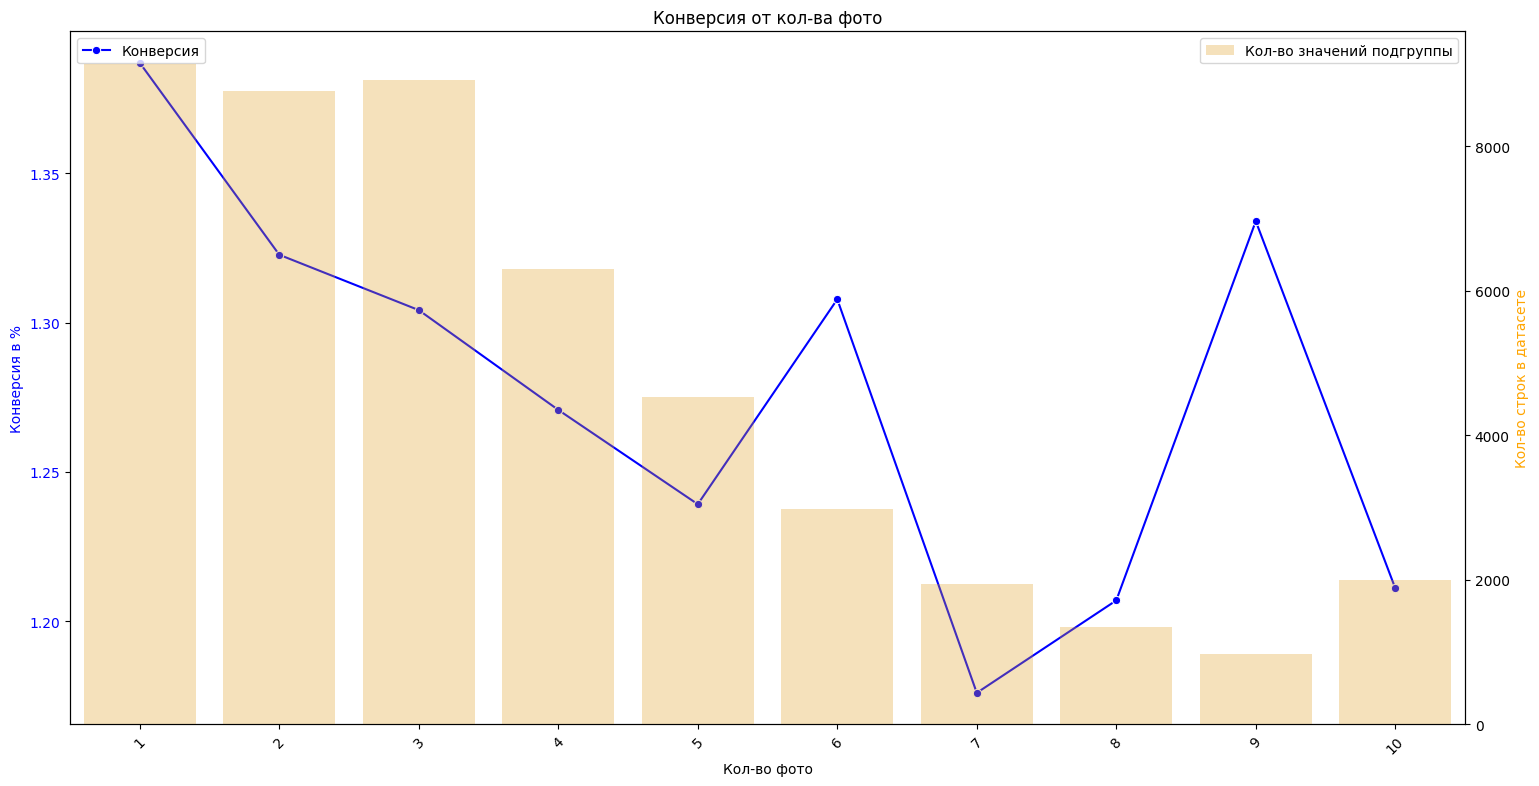

D:\Программы\Temp\Temp\ipykernel_18456\1101642159.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('bins').agg(median_y=(y, 'mean' if do_mean else 'median'), count=(y, 'size')).reset_index()


            bins  median_y  count
0  (-0.02, 3.32]  1.338402  26827
1   (3.32, 6.66]  1.268410  13822
2   (6.66, 10.0]  1.218550   6249


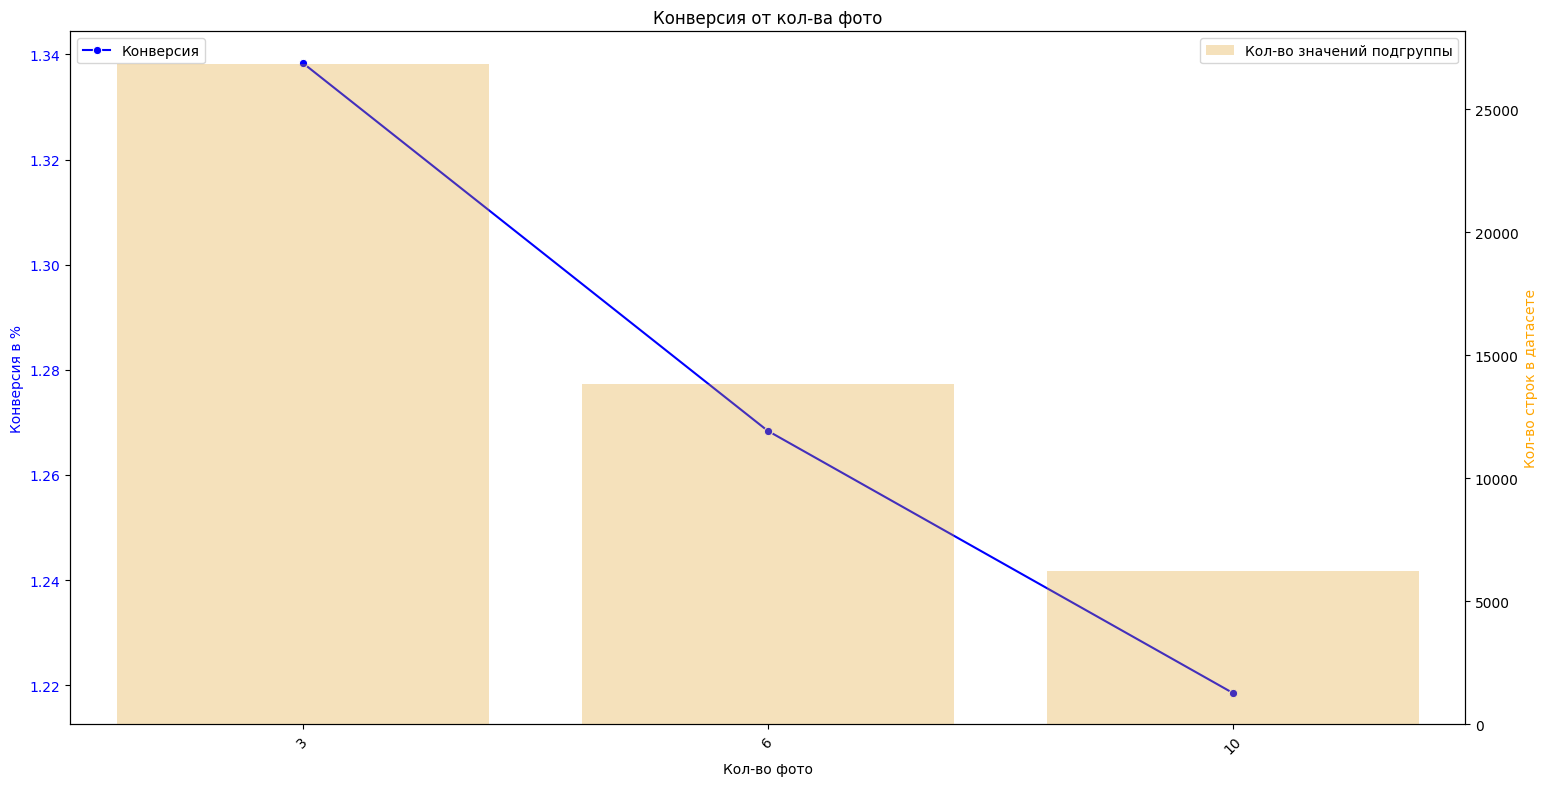

D:\Программы\Temp\Temp\ipykernel_18456\1101642159.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('bins').agg(median_y=(y, 'mean' if do_mean else 'median'), count=(y, 'size')).reset_index()


            bins  median_y  count
0  (-0.02, 0.49]  1.305684  45975
1    (0.49, 1.0]  1.108537    923


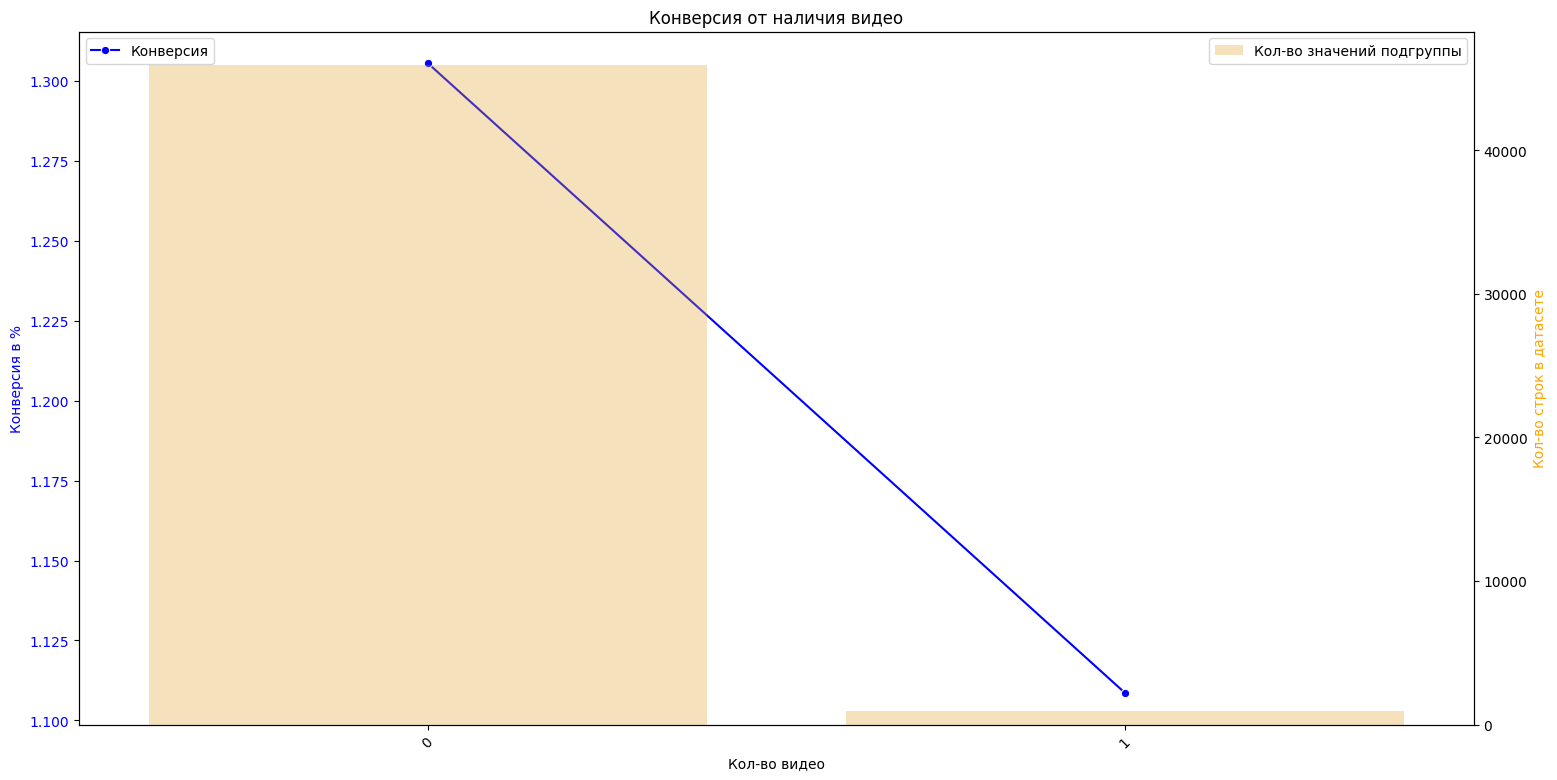

D:\Программы\Temp\Temp\ipykernel_18456\1101642159.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('bins').agg(median_y=(y, 'mean' if do_mean else 'median'), count=(y, 'size')).reset_index()


             bins  median_y  count
0  (-0.02, 0.817]  1.417066  15301
1  (0.817, 1.653]  1.373469    399
2   (1.653, 2.49]  1.417544    125
3   (2.49, 3.327]  1.274005    514
4  (3.327, 4.163]  1.241960   1261
5    (4.163, 5.0]  1.217061  27882


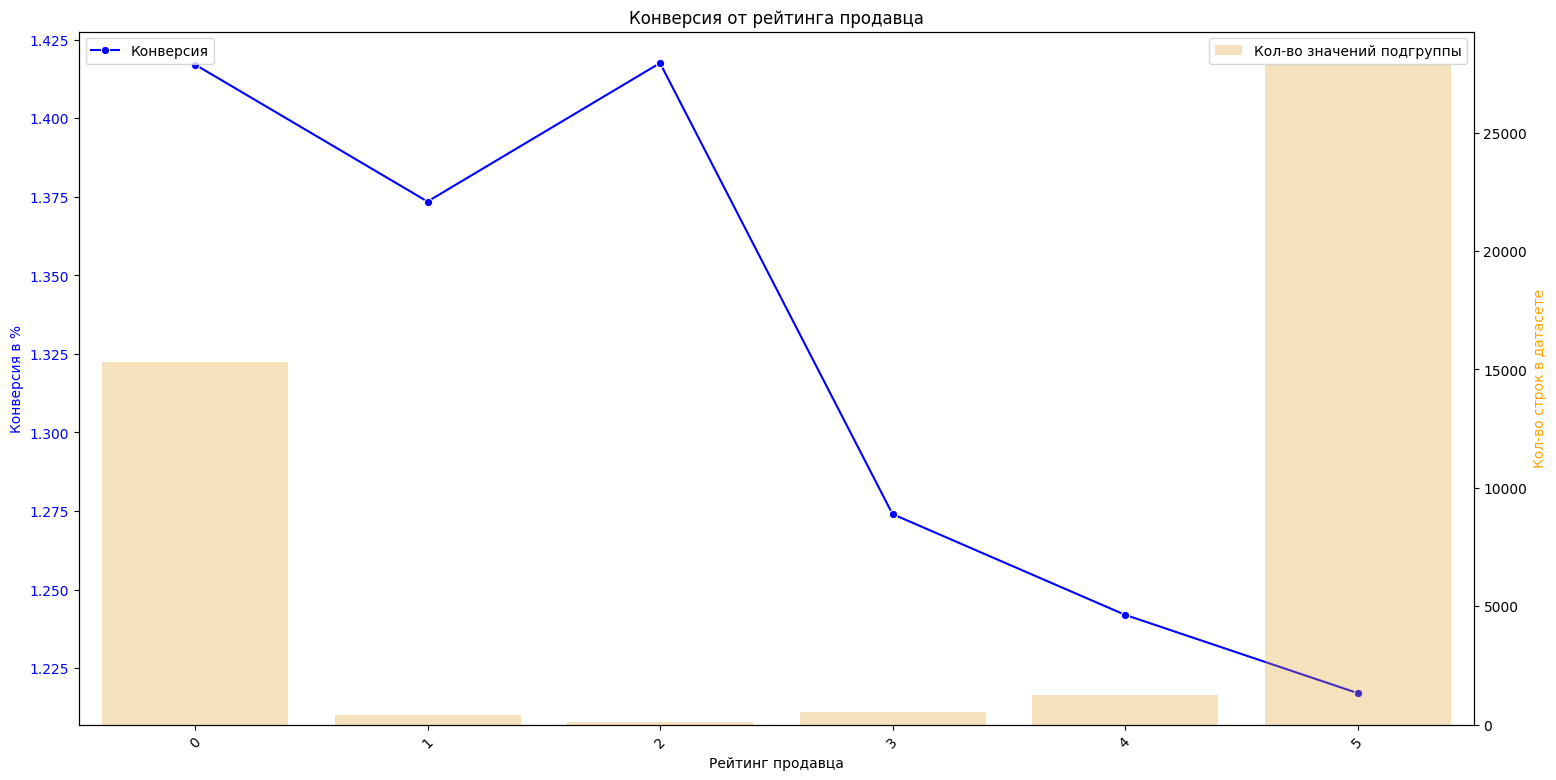

D:\Программы\Temp\Temp\ipykernel_18456\1101642159.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('bins').agg(median_y=(y, 'mean' if do_mean else 'median'), count=(y, 'size')).reset_index()


                      bins  median_y  count
0        (-0.02, 3448.257]  1.169694  31177
1     (3448.257, 6896.533]  1.652972   1129
2     (6896.533, 10344.81]  1.647708   1062
3    (10344.81, 13793.086]  1.758127    269
4   (13793.086, 17241.363]  1.664290    787
5   (17241.363, 20689.639]  1.695962    608
6   (20689.639, 24137.916]  1.912034     85
7   (24137.916, 27586.192]  1.566170    412
8   (27586.192, 31034.469]  1.273462    278
9   (31034.469, 34482.746]  0.865481     15
10  (34482.746, 37931.022]  1.093955    227
11  (37931.022, 41379.299]  1.007854    194
12  (41379.299, 44827.575]  0.295224      5
13  (44827.575, 48275.852]  1.171923     92
14  (48275.852, 51724.128]  1.024953    175
15  (51724.128, 55172.405]  0.798569     57
16  (55172.405, 58620.681]  0.000000      1
17  (58620.681, 62068.958]  0.635261    116
18  (62068.958, 65517.234]  0.601984     28
19  (65517.234, 68965.511]       NaN      0
20  (68965.511, 72413.788]  1.082072     66
21  (72413.788, 75862.064]  0.63

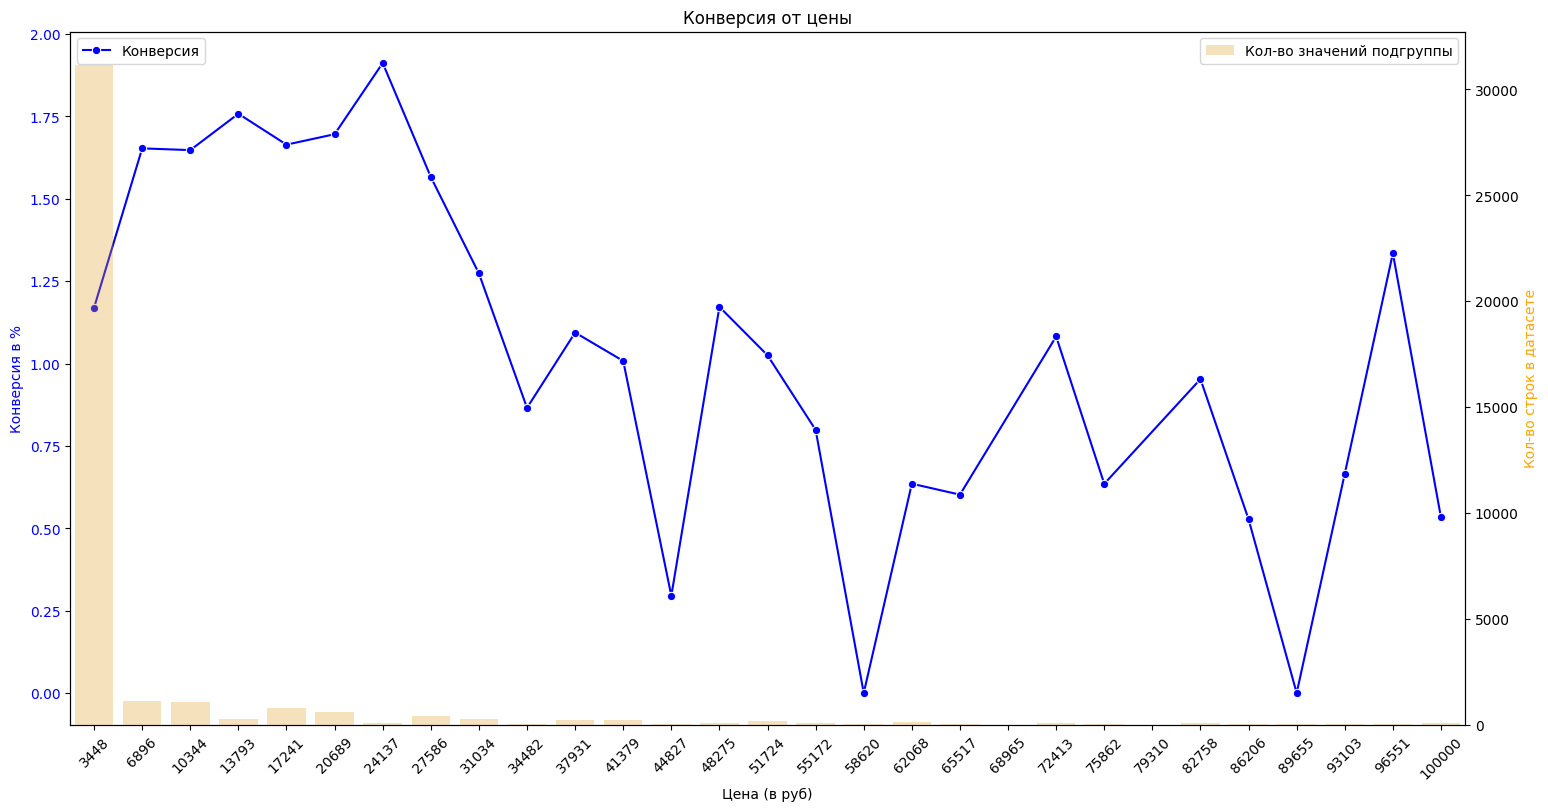

In [507]:
df = df[(df['age'] <= 120) | (df['age'].isna())]
print('age', str((1 - (len(df['CR']) / f)) * 100 - float(procentage)) + '% выбросы')
procentage = str((1 - (len(df['CR']) / f)) * 100)
print(f - len(df['CR']), 'удалено')

data_len = len(df)
df['has_video'].replace({'ЛОЖЬ': 0, 'ИСТИНА': 1}, inplace=True)
df['CR'].replace([np.inf, -np.inf], 0, inplace=True)
sns.kdeplot(df['description_length'])
plt.show()

df = df[df['price'] <= 100000]
print('price', str((1 - (len(df['CR']) / f)) * 100 - float(procentage)) + '% выбросы')
procentage = str((1 - (len(df['CR']) / f)) * 100)
print(f - len(df['CR']), 'удалено')
sns.kdeplot(df['price'])
plt.show()

df = df[df['description_length'] <= 1200]
print('desc', str((1 - (len(df['CR']) / f)) * 100 - float(procentage)) + '% выбросы')
procentage = str((1 - (len(df['CR']) / f)) * 100)
print(f - len(df['CR']), 'удалено')

df = df[df['photo_count'] > 0]
print('photo', str((1 - (len(df['CR']) / f)) * 100 - float(procentage)) + '% выбросы')
procentage = str((1 - (len(df['CR']) / f)) * 100)
print(f - len(df['CR']), 'удалено')

print('итог вапрпывоарпроа')
print(procentage)
print(len(df))
group_df = pd.DataFrame()

def plot_line(x, y, title, xlabel, ylabel, df=df, bins=20):

    # Создание интервалов для оси X
    df['x_bins'] = list(map(lambda x: x.right, pd.cut(df[x], bins=bins)))  # Разбиваем на интервалы
    # Вычисление среднего значения Y для каждого интервала
    median_data = df.groupby('x_bins')[y].mean().reset_index()  # Группировка и расчет среднего
    median_data = median_data.dropna()

    group_df['x_bins'] = median_data['x_bins']
    group_df['CR'] = median_data['CR']
    # Проверка на наличие данных в median_data
    if median_data.empty:
        print("Нет данных для построения графика.")
        return

    # Построение графика
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=median_data, x='x_bins', y=y, marker='o')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)  # Поворот меток по оси X для лучшей читаемости
    plt.show()


def plot_line_count(x, y, title, xlabel, ylabel, df=df, bins=20, do_mean=True, minim=-0.02):

    # Создание группировки по бинам
    bins = np.linspace(minim, df[x].max(), num=bins)
    df['bins'] = pd.cut(df[x], bins=bins)
    grouped = df.groupby('bins').agg(median_y=(y, 'mean' if do_mean else 'median'), count=(y, 'size')).reset_index()

    bin_centers = grouped['bins'].apply(lambda x: x.right)
    print(grouped)

    # Построение графиков
    fig, ax1 = plt.subplots(figsize=(18, 9))

    # График медианных значений
    sns.lineplot(x=range(len(bin_centers)), y=grouped['median_y'], ax=ax1, color='b', marker='o', label='Конверсия')
    ax1.set_title(title)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel, color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    ax1.set_xticks(range(len(bin_centers)))
    ax1.set_xticklabels([f"{int(b.right)}" for b in grouped['bins']], rotation=45)

    # Создание второго оси для количества значений
    ax2 = ax1.twinx()
    sns.barplot(x=range(len(bin_centers)), y=grouped['count'], ax=ax2, color='orange', alpha=0.3, label='Кол-во значений подгруппы')
    ax2.set_ylabel('Кол-во строк в датасете', color='orange')
    ax2.tick_params(axis='y')
    ax2.set_xticks(range(len(bin_centers)))
    ax2.set_xticklabels([f"{int(b.right)}" for b in grouped['bins']], rotation=45)

    # Добавление легенды
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    plt.show()

plot_line_count('description_length', 'CR', 'Конверсия от длинны описания', 'Длинна (символы)', 'Конверсия в %', df, bins=30)

plot_line_count('photo_count', 'CR', 'Конверсия от кол-ва фото', 'Кол-во фото', 'Конверсия в %', df, bins=11, minim=0)

plot_line_count('photo_count', 'CR', 'Конверсия от кол-ва фото', 'Кол-во фото', 'Конверсия в %', df, bins=4)

plot_line_count('has_video', 'CR', 'Конверсия от наличия видео', 'Кол-во видео', 'Конверсия в %', df, bins=3)

plot_line_count('seller_rating', 'CR', 'Конверсия от рейтинга продавца', 'Рейтинг продавца', 'Конверсия в %', df, bins=7)

plot_line_count('price', 'CR', 'Конверсия от цены', 'Цена (в руб)', 'Конверсия в %', df, bins=30)


print('photo', str((1 - (len(df['CR']) / f)) * 100 - float(procentage)) + '% выбросы')
procentage = str((1 - (len(df['CR']) / f)) * 100)
print(f - len(df['CR']), 'удалено')

In [508]:
import statsmodels.api as sm


df2 = data
df2['has_video'].replace({'ЛОЖЬ': 0, 'ИСТИНА': 1}, inplace=True)
df2['CR'].replace([np.inf, -np.inf], 0, inplace=True)
df2 = df2.dropna(subset=['category', 'age', 'description_length', 'CTR', 'CR', 'has_video'])

X = df2[['description_length', 'photo_count', 'has_video']].astype(int) # Независимые переменные
Y = df2['CR'] # Зависимая переменная

# Добавляем константу к независимым переменным
X = sm.add_constant(X)

# Создаем модель OLS
model = sm.OLS(Y, X)

# Подгоняем модель
results = model.fit()

# Выводим результаты
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     CR   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     36.36
Date:                Mon, 16 Dec 2024   Prob (F-statistic):           1.86e-23
Time:                        11:52:49   Log-Likelihood:            -1.1599e+05
No. Observations:               40660   AIC:                         2.320e+05
Df Residuals:                   40656   BIC:                         2.320e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.7764      0

D:\Программы\Temp\Temp\ipykernel_18456\828524488.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['has_video'].replace({'ЛОЖЬ': 0, 'ИСТИНА': 1}, inplace=True)
D:\Программы\Temp\Temp\ipykernel_18456\828524488.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh